<a href="https://colab.research.google.com/github/Innocent-Gershon/machine_learning_PCA/blob/main/Template_PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

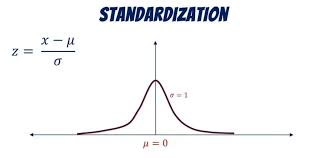


In [ ]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
standardized_data = None  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


### Step 1: Load and Standardize the Data
Before applying PCA, I have to standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.


![](<binary data omitted>)

In [7]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

# Drop the date column before converting to numpy array
df_processed_numeric = df_processed.drop('reservation_status_date', axis=1)

# Convert the processed dataframe to a numpy array and ensure numeric dtype
data_np = df_processed_numeric.values.astype(float)

# Calculate the mean and standard deviation for each feature using numpy
mean = np.mean(data_np, axis=0)
std_dev = np.std(data_np, axis=0)

# Standardize the data using the formula: (Data - Data Mean) / Data's Standard Deviation
# Add a small epsilon to the standard deviation to avoid division by zero in case of features with zero variance
epsilon = 1e-8
standardized_data = (data_np - mean) / (std_dev + epsilon)

# Display the first few rows of standardized data
print("First 5 rows of standardized data:")
display(standardized_data[:5])
print("\nShape of standardized data:", standardized_data.shape)

First 5 rows of standardized data:


array([[-0.76704048,  2.22705112, -1.63476792, ..., -0.75049901,
         0.76704048, -0.10105925],
       [-0.76704048,  5.9233847 , -1.63476792, ..., -0.75049901,
         0.76704048, -0.10105925],
       [-0.76704048, -0.90781407, -1.63476792, ..., -0.75049901,
         0.76704048, -0.10105925],
       [-0.76704048, -0.85166723, -1.63476792, ..., -0.75049901,
         0.76704048, -0.10105925],
       [-0.76704048, -0.84230942, -1.63476792, ..., -0.75049901,
         0.76704048, -0.10105925]])


Shape of standardized data: (119390, 261)


In [2]:
import pandas as pd
import numpy as np
import os

# Load the dataset
# The dataset is located at '/kaggle/input/hotel-booking-demand/hotel_bookings.csv' based on the output from cell mPcXy4z_hEV-
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

# Inspect the data
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())
print("\nDataset information:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nUnique values in non-numeric columns:")
for col in df.select_dtypes(exclude=np.number).columns:
    print(f"{col}: {df[col].unique()[:10]}") # Print only up to 10 unique values for brevity

Dataset shape: (119390, 32)

First 5 rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  

### Step 2: Handle Missing Values and Non-Numeric Data

Based on the inspection in the previous step, I need to handle missing values and non-numeric columns. For missing values, I will use appropriate imputation techniques. For non-numeric columns, I will use one-hot encoding.

In [4]:
# Step 2: Handle Missing Values and Non-Numeric Data

# Impute missing values
# For 'children', we can impute with the mean or median as it's a numerical column. Let's use the median.
df['children'] = df['children'].fillna(df['children'].median())

# For 'country', which is categorical, we can impute with the mode (most frequent value).
df['country'] = df['country'].fillna(df['country'].mode()[0])

# For 'agent' and 'company', which have a large number of missing values,
# and represent IDs, we can consider imputing with a placeholder value or dropping them.
# Given the potential information they might hold, let's impute with 0, assuming 0 represents no agent or company.
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Handle non-numeric data using one-hot encoding
# Identify non-numeric columns again after handling missing values in some.
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Exclude 'reservation_status_date' as it's a date and might require different handling or be excluded from PCA.
# For this PCA implementation, we will exclude date columns.
non_numeric_cols.remove('reservation_status_date')


df_processed = pd.get_dummies(df, columns=non_numeric_cols, dummy_na=False) # dummy_na=False to avoid creating a column for NaN which we have already handled

# Display the first few rows of the processed data and its info to verify
print("First 5 rows of the processed dataset:")
display(df_processed.head())
print("\nProcessed dataset information:")
df_processed.info()
print("\nMissing values after handling:")
print(df_processed.isnull().sum().sum()) # Check if there are any remaining missing values

First 5 rows of the processed dataset:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0.0,0,...,True,False,False,False,False,True,False,False,True,False
1,0,737,2015,27,1,0,0,2,0.0,0,...,True,False,False,False,False,True,False,False,True,False
2,0,7,2015,27,1,0,1,1,0.0,0,...,True,False,False,False,False,True,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,...,True,False,False,False,False,True,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,...,True,False,False,False,False,True,False,False,True,False



Processed dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 262 entries, is_canceled to reservation_status_No-Show
dtypes: bool(241), float64(4), int64(16), object(1)
memory usage: 46.6+ MB

Missing values after handling:
0


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [8]:
# Step 3: Calculate the Covariance Matrix
# Calculate the covariance matrix using numpy.cov
# rowvar=False because each column represents a variable (feature) and rows are observations
cov_matrix = np.cov(standardized_data, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix (first 5x5 block):")
display(cov_matrix[:5, :5])
print("\nShape of the Covariance Matrix:", cov_matrix.shape)

Covariance Matrix (first 5x5 block):


array([[ 1.00000833e+00,  2.93125805e-01,  1.66599992e-02,
         8.14813347e-03, -6.13013007e-03],
       [ 2.93125805e-01,  1.00000838e+00,  4.01424354e-02,
         1.26871875e-01,  2.26757169e-03],
       [ 1.66599992e-02,  4.01424354e-02,  1.00000835e+00,
        -5.40565850e-01, -2.21021058e-04],
       [ 8.14813347e-03,  1.26871875e-01, -5.40565850e-01,
         1.00000837e+00,  6.68098125e-02],
       [-6.13013007e-03,  2.26757169e-03, -2.21021058e-04,
         6.68098125e-02,  1.00000837e+00]])


Shape of the Covariance Matrix: (261, 261)


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [9]:
# Step 4: Perform Eigendecomposition
# Calculate eigenvalues and eigenvectors of the covariance matrix using numpy.linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display the first few eigenvalues and the shape of eigenvectors
print("First 10 Eigenvalues:")
display(eigenvalues[:10])
print("\nShape of Eigenvectors:", eigenvectors.shape)

First 10 Eigenvalues:


array([5.93137707, 4.30553877, 3.65381559, 3.27663024, 2.62458251,
       2.55773409, 2.30341642, 2.17410278, 2.02434181, 1.95104151])


Shape of Eigenvectors: (261, 261)


### Step 5: Sort Principal Components
I sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

How Is Explained Variance Used In PCA?

Explained variance in PCA tells us the proportion of the dataset's total variance that each principal component captures. By sorting the principal components based on their explained variance (which is directly related to the eigenvalues), we can prioritize the components that retain the most information. This allows us to select a subset of the top principal components that capture a significant portion of the total variance, effectively reducing dimensionality while minimizing information loss. We can then decide how many components to keep based on a desired cumulative explained variance threshold (e.g., retaining 95% of the variance).

In [10]:
# Step 5: Sort Principal Components
# Sort eigenvalues in descending order and get the indices
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvectors accordingly
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the first few rows and columns of the sorted eigenvectors
print("Sorted Eigenvectors (first 5x5 block):")
display(sorted_eigenvectors[:5, :5])
print("\nShape of Sorted Eigenvectors:", sorted_eigenvectors.shape)

Sorted Eigenvectors (first 5x5 block):


array([[-2.58341474e-01, -1.86163549e-01, -2.18031471e-01,
        -1.39451793e-01, -3.98408599e-02],
       [-1.78302116e-01, -9.71049007e-02, -1.04673877e-01,
         1.66990405e-01,  3.20773178e-02],
       [ 6.27158161e-02, -1.05716450e-01,  4.93837909e-02,
        -1.87076633e-01, -3.00327723e-01],
       [-2.47501792e-02,  1.33011633e-02, -4.25883085e-02,
         1.78089500e-01,  3.90392011e-01],
       [ 5.06029260e-03, -1.50842954e-04, -4.77498390e-03,
        -9.73020300e-05,  2.51698131e-02]])


Shape of Sorted Eigenvectors: (261, 261)


### Step 6: Project Data onto Principal Components
Now that I have selected the number of components, I will then project the original data onto the chosen principal components.


In [11]:
# Step 6: Calculate Explained Variance

# Calculate the total variance
total_variance = np.sum(eigenvalues)

# Calculate the explained variance ratio for each eigenvalue
explained_variance_ratio = eigenvalues / total_variance

# Sort the explained variance ratio in descending order
sorted_explained_variance_ratio = explained_variance_ratio[sorted_indices]

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(sorted_explained_variance_ratio)

# Display the explained variance ratio and cumulative explained variance
print("Explained Variance Ratio (first 10 components):")
display(sorted_explained_variance_ratio[:10])
print("\nCumulative Explained Variance (first 10 components):")
display(cumulative_explained_variance[:10])

Explained Variance Ratio (first 10 components):


array([0.02272544, 0.01649621, 0.0139992 , 0.01255406, 0.01005581,
       0.00979968, 0.00882529, 0.00832984, 0.00775605, 0.00747521])


Cumulative Explained Variance (first 10 components):


array([0.02272544, 0.03922165, 0.05322085, 0.06577491, 0.07583072,
       0.0856304 , 0.0944557 , 0.10278554, 0.11054159, 0.1180168 ])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Select Number of Components
Dynamically select the number of principal components to keep based on the cumulative explained variance. We will choose the minimum number of components that explain at least 95% of the total variance.

In [12]:
# Step 8: Select Number of Components

# Set the desired level of explained variance
desired_variance_threshold = 0.95

# Find the number of components that explain at least the desired variance
num_components = np.argmax(cumulative_explained_variance >= desired_variance_threshold) + 1

print(f"Number of components to retain for {desired_variance_threshold*100}% explained variance: {num_components}")

Number of components to retain for 95.0% explained variance: 219


### Step 9: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [13]:
# Step 9: Project Data onto Principal Components

# Select the top 'num_components' eigenvectors (principal components)
principal_components = sorted_eigenvectors[:, :num_components]

# Project the standardized data onto the principal components
reduced_data = np.dot(standardized_data, principal_components)

# Display the first few rows of reduced data
print("First 5 rows of reduced data:")
display(reduced_data[:5])
print("\nShape of reduced data:", reduced_data.shape)

First 5 rows of reduced data:


array([[ 2.67690422,  3.12040833, -3.97646209, ...,  0.04061305,
         0.54633628, -0.82655996],
       [ 2.12882639,  2.86238457, -4.37089025, ...,  0.28913782,
         0.92546047, -1.23037738],
       [ 2.49489937,  3.13126667, -1.71129828, ..., -0.9750948 ,
         0.54823788,  0.86949883],
       [ 1.06669718,  4.57423502, -0.42055429, ..., -0.57704292,
         0.75836636,  1.21637656],
       [ 1.42137652, -0.09818881,  0.31838191, ..., -0.68409363,
         0.48087401,  1.24628603]])


Shape of reduced data: (119390, 219)


### Step 10: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

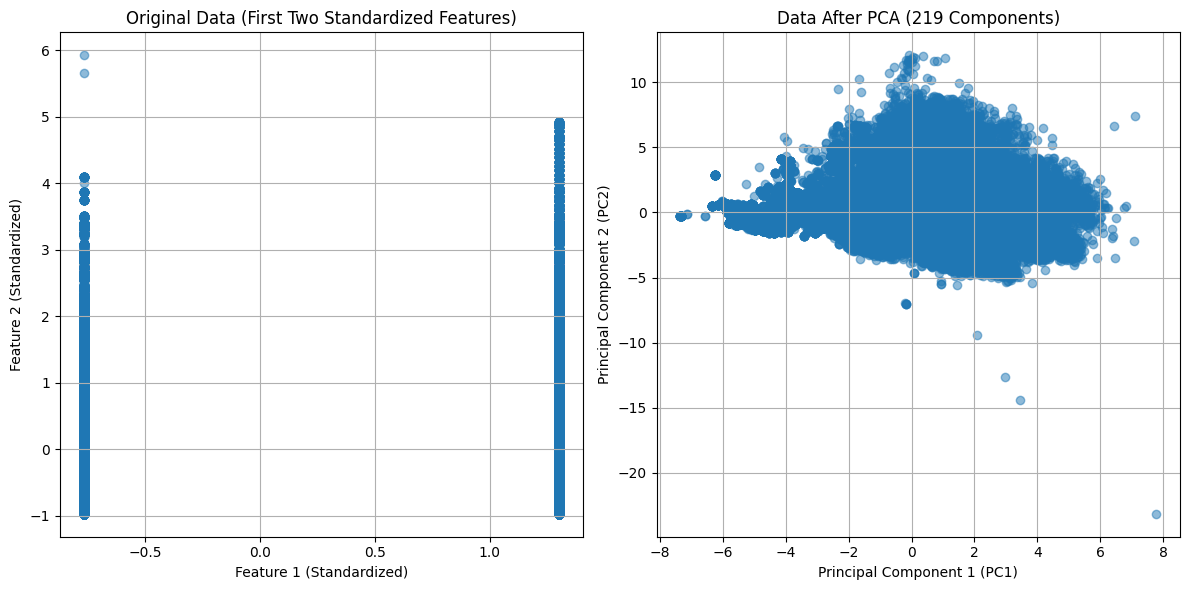

In [14]:
import matplotlib.pyplot as plt

# Step 10: Visualize Before and After PCA

# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# We will plot the first two columns of the original standardized data
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.title('Original Data (First Two Standardized Features)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)

# Plot reduced data after PCA (first two principal components)
plt.subplot(1, 2, 2)
# We will plot the first two columns of the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title(f'Data After PCA ({num_components} Components)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)

plt.tight_layout()
plt.show()

### Step 11: Optimize Implementation (Optional but Recommended for Large Datasets)

For very large datasets, the direct eigendecomposition of the covariance matrix can be computationally expensive. In such cases, consider using optimized libraries like `scikit-learn`'s `PCA` which uses more efficient algorithms like Singular Value Decomposition (SVD) under the hood. Since the assignment requires using only NumPy for the core PCA steps, this optimization step is more of a note for real-world applications.

### Step 12: Finish Task

I have completed all the steps of the PCA implementation:
- Loaded and inspected the data.
- Handled missing values and non-numeric data.
- Standardized the data using NumPy.
- Calculated the covariance matrix using NumPy.
- Performed eigendecomposition using NumPy.
- Sorted principal components by eigenvalues.
- Calculated explained variance.
- Dynamically selected the number of components based on explained variance.
- Projected the data onto the principal components.
- Displayed the reduced data.
- Visualized the data before and after PCA.

